# Demonstrate a usage of `OrbitDirection` &  `QDOrbitDirection` flags

We use the same example data as in `model_residuals_and_cartopy.ipynb` to demonstrate splitting each orbit into two parts, depending on the orbit direction being ascending (increasing latitude) or descending (decreasing latitude). This is equivalent to splitting according to the local time sectors.

We use `pandas.DataFrame` in this example.

In [1]:
from viresclient import SwarmRequest
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

request = SwarmRequest(url="https://staging.viresdisc.vires.services/openows")
request.set_collection("SW_OPER_MAGA_LR_1B")
request.set_products(
    measurements=["B_NEC"],
    models=[
        "'Combined_model' = 'MCO_SHA_2F' + 'MMA_SHA_2F-Primary' + 'MMA_SHA_2F-Secondary'"
    ],
    residuals=True,
    auxiliaries=["OrbitNumber", "QDLat", "OrbitDirection", "QDOrbitDirection"],
    sampling_step="PT10S"
)

data = request.get_between(
    start_time=dt.datetime(2016,1,1),
    end_time=dt.datetime(2016,1,2)
)
df = data.as_dataframe()
# Extract the vertical residual and append to the dataframe
df["Z_res"] = np.stack(df["B_NEC_res_Combined_model"])[:, 2]
df.head()

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.62MB)


,Spacecraft,Latitude,Longitude,Radius,B_NEC_res_Combined_model,OrbitNumber,QDLat,OrbitDirection,QDOrbitDirection,Z_res
Timestamp,,,,,,,,,,
2016-01-01 00:00:00,A,-72.499224,92.793967,6833853.08,"[18.6839275602822, -186.29082427811045, -10.46...",11803,-81.095398,-1,-1,-10.465232
2016-01-01 00:00:10,A,-73.130685,93.091639,6833864.74,"[19.84446649763504, -186.57875194742883, -6.61...",11803,-81.428322,-1,-1,-6.612288
2016-01-01 00:00:20,A,-73.761537,93.414902,6833875.98,"[18.754720824240394, -182.36044834860513, -3.5...",11803,-81.729675,-1,-1,-3.532202
2016-01-01 00:00:30,A,-74.391708,93.766833,6833886.81,"[15.148384715127577, -182.7220925423244, 0.856...",11803,-81.995934,-1,-1,0.856288
2016-01-01 00:00:40,A,-75.021114,94.151014,6833897.24,"[13.57969803106107, -182.18656696076687, 4.819...",11803,-82.223518,-1,-1,4.819139


# Plot the data against time and against latitude

This shows initially strong currents around the poles, which subsequently decrease in strength over the day. The plot against latitude is done as a scatter plot so that its colour can change. Colouring each orbit by its `OrbitNumber` shows the progression of time.

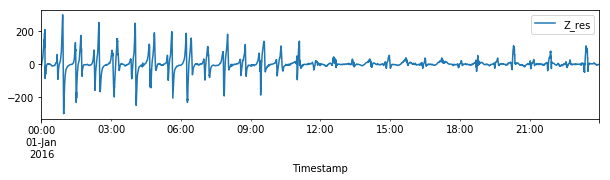

In [2]:
df.plot(y="Z_res", figsize=(10,2));

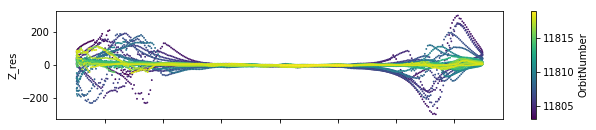

In [3]:
df.plot(
    x="Latitude", y="Z_res", kind="scatter", c="OrbitNumber",
    cmap=cm.viridis, s=0.7, figsize=(10,2)
);

# Split into two plots according to the `OrbitDirection`

`OrbitDirection` and `QDOrbitDirection` have values 1 (ascending), -1 (descending), or 0 (no data)

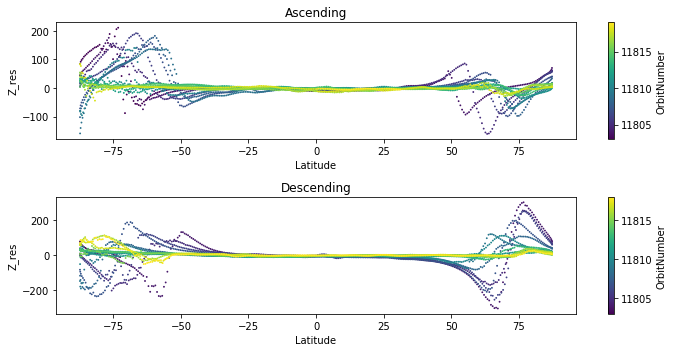

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,5), )
df.where(df["OrbitDirection"]==1).plot(
    x="Latitude", y="Z_res", kind="scatter", c="OrbitNumber",
    cmap=cm.viridis, s=0.7, ax=axes[0], title="Ascending"
)
df.where(df["OrbitDirection"]==-1).plot(
    x="Latitude", y="Z_res", kind="scatter", c="OrbitNumber",
    cmap=cm.viridis, s=0.7, ax=axes[1], title="Descending"
)
plt.tight_layout()

# Instead split according to `QDOrbitDirection` and plot against `QDLat`

This shows that the currents are better organised in QD latitude

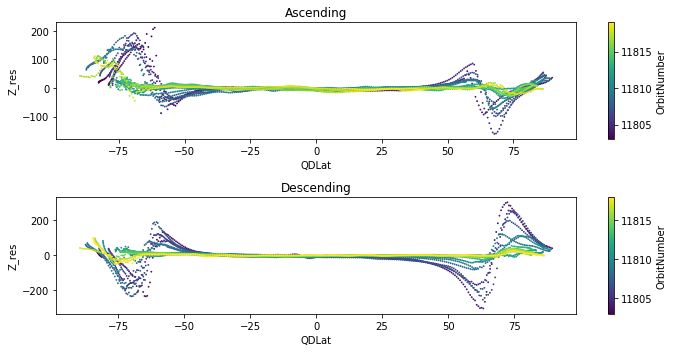

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,5))
df.where(df["QDOrbitDirection"]==1).plot(
    x="QDLat", y="Z_res", kind="scatter", c="OrbitNumber",
    cmap=cm.viridis, s=0.7, ax=axes[0], title="Ascending"
)
df.where(df["QDOrbitDirection"]==-1).plot(
    x="QDLat", y="Z_res", kind="scatter", c="OrbitNumber",
    cmap=cm.viridis, s=0.7, ax=axes[1], title="Descending"
)
plt.tight_layout()